# Data Wrangling with Python

### This workshop provides an introduction to the data analysis suite used for data science projects in Python. 

We will cover the following commonly used libraries (click on links for respective user guide/documentation):
- [Pandas](https://pandas.pydata.org/docs/user_guide/index.html): Manipulating and analyzing tabular data 
- [NumPy](https://numpy.org/doc/stable/user/quickstart.html): Linear algebra operations
- [SciPy](https://docs.scipy.org/doc/scipy/getting_started.html): Extension over NumPy for scientific computation
- [Seaborn](https://seaborn.pydata.org/tutorial.html): A high-level library for data visualization 

## Pandas

In [296]:
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (3,2)
plt.rcParams.update({'font.size': 5})

In [84]:
df = pd.read_csv('titanic.csv')

In [85]:
df.shape

(1309, 14)

In [86]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Data Dictionary

- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

In [97]:
df.head(2).T

,0,1
pclass,1,1
survived,1,1
name,"Allen, Miss. Elisabeth Walton","Allison, Master. Hudson Trevor"
sex,female,male
age,29.0,0.9167
sibsp,0,1
parch,0,2
ticket,24160,113781
fare,211.3375,151.55
cabin,B5,C22 C26


In [87]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [88]:
df['survived'].value_counts(normalize = True)

0    0.618029
1    0.381971
Name: survived, dtype: float64

In [89]:
df.isnull().sum(axis = 0)

pclass          0
survived        0
name            0
sex             0
age           264
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [90]:
# df [ filter_logic ]
df[df['age'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
9,1,0,"Artagaveytia, Mr. Ramon",male,NaN,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,3,0,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,NaN,NaN,NaN
1297,3,0,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S,NaN,NaN,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN


In [137]:
df[df['age'].isnull()]['age']

9      NaN
15     NaN
37     NaN
40     NaN
46     NaN
        ..
1293   NaN
1297   NaN
1302   NaN
1303   NaN
1305   NaN
Name: age, Length: 264, dtype: float64

In [138]:
df['age'].mean()

29.841786315789474

In [140]:
import numpy as np

df['age'] = np.where(df['age'].isnull(), df['age'].mean(), df['age'])

In [141]:
df.groupby('survived')['age'].agg(['mean', 'count'])

,mean,count
survived,,
0,30.329252,809
1,29.053068,500


In [151]:
df.groupby('embarked')['age'].mean()

embarked
C    31.644748
Q    29.349190
S    29.331363
Name: age, dtype: float64

In [153]:
df.groupby(['survived', 'embarked'])['age'].agg(['count', 'mean'])

count       mean
survived embarked                  
0        C           120  32.583444
         Q            79  30.010823
         S           610  29.927043
1        C           150  30.893792
         Q            44  28.161259
         S           304  28.136084

In [169]:
survived = df[['survived', 'embarked', 'age']].replace({0: 'Did Not Survive', 1: 'Survived'})

survived = df[['survived', 'embarked', 'age']].replace({'survived': 
                                                        {0: 'Did Not Survive', 
                                                         1: 'Survived'}
                                                       })
survived.groupby(['survived', 'embarked'])['age'].agg(['count', 'mean'])

count       mean
survived        embarked                  
Did Not Survive C           120  32.583444
                Q            79  30.010823
                S           610  29.927043
Survived        C           150  30.893792
                Q            44  28.161259
                S           304  28.136084

In [170]:
survived.groupby(['survived', 'embarked'])['age'].agg(['count', 'mean']).style.background_gradient(cmap='viridis')

In [173]:
df['fare'].mean()

33.29547928134572

In [178]:
df['fare'].median()

14.4542

In [194]:
df['age_bracket'] = pd.cut(df['age'], bins = 3, labels = ['Low', 'Medium', 'High'])
df['age_bracket'].value_counts()

Medium    759
Low       474
High       76
Name: age_bracket, dtype: int64

In [210]:
df.pivot_table(index = ['embarked'], columns = ['sex'], values = ['survived'], aggfunc='mean')

survived          
sex         female      male
embarked                    
C         0.902655  0.305732
Q         0.616667  0.111111
S         0.680412  0.170144

In [211]:
df.pivot_table(index = ['embarked'], columns = ['sex'], values = ['survived'], aggfunc='mean', margins = True)

survived                    
sex         female      male       All
embarked                              
C         0.902655  0.305732  0.555556
Q         0.616667  0.111111  0.357724
S         0.680412  0.170144  0.332604
All       0.726293  0.190985  0.381025

In [222]:
df.pivot_table(index = ['embarked'], 
               columns = ['sex'], 
               values = ['survived'], 
               aggfunc='mean', 
               margins = True).style.background_gradient(cmap='YlOrRd_r').format(precision=2)

In [228]:
df.pivot_table(index = ['age_bracket'], 
               columns = ['sex'], 
               values = ['survived'], 
               aggfunc='mean',
               margins = True).style.bar().format(precision=2)

In [258]:
pivot = df.pivot_table(index = ['pclass'], 
               columns = ['sex'], 
               values = ['survived'], 
               aggfunc='mean',
               margins = False).reset_index()

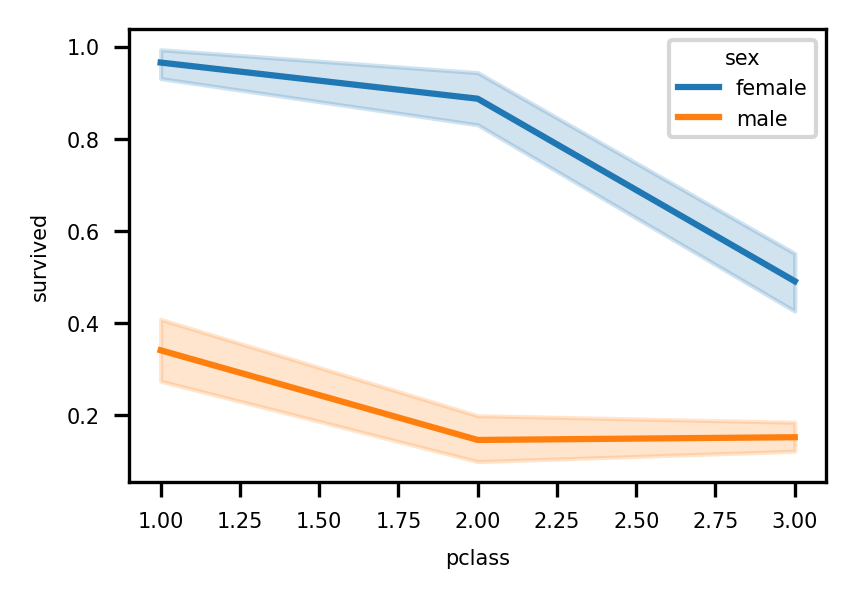

In [302]:
ax = sns.lineplot(data = df, 
             x="pclass", 
             y="survived",
             hue="sex",
             )

[]

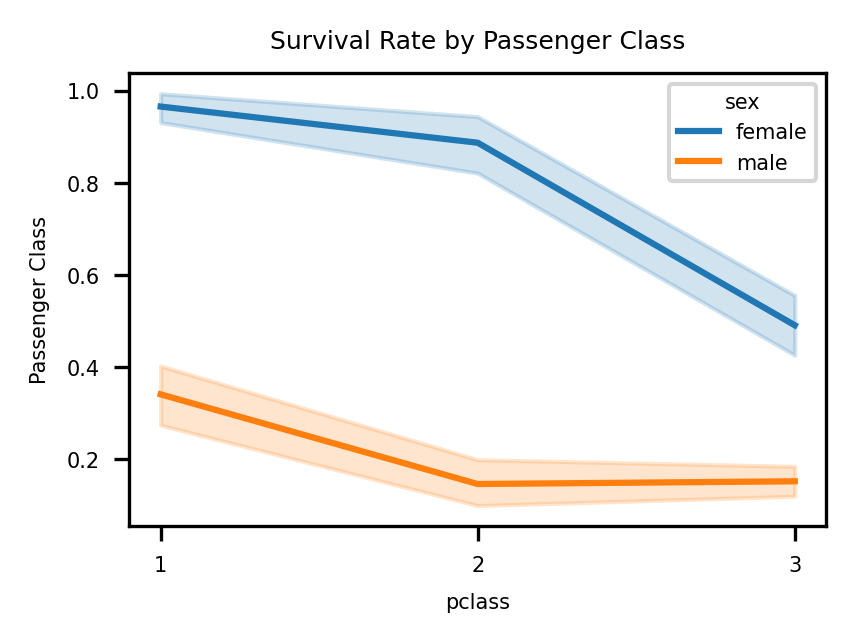

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator #To ensure integer ticks

ax = sns.lineplot(data = df, 
             x="pclass", 
             y="survived",
             hue="sex",
             )

ax.set_title('Survival Rate by Passenger Class')
ax.set_ylabel('Survival Rate')
ax.set_ylabel('Passenger Class')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot()